In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom

import os, sys
sys.path.append(os.path.abspath('..'))

from src.cine2gridtag import sim_gridtag, mod_contrast

In [2]:
# Load sample cine dicom
filepath = '../sample_data/im_s0035_0002.dcm'
ds = pydicom.read_file(filepath)

# This particular dataset is weirdly transposed, hence the [::-1] and .T
im = ds.pixel_array.astype(float).T[:, ::-1]

# This isn't really necessary, but helps window level consistency
im /= im.max()

(<matplotlib.image.AxesImage at 0x7f99f0a97fd0>, (-0.5, 143.5, 191.5, -0.5))

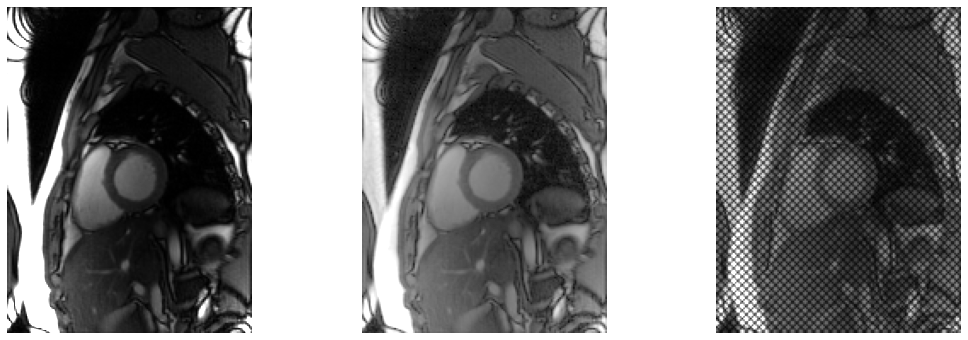

In [3]:
im_c = mod_contrast(im)

im_grid = sim_gridtag(im_c, 3.5)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# fat is really bright in these images, right now I just manually set window level (clim)
ax[0].imshow(im, cmap='gray', clim=(0, 0.2)), ax[0].axis('off')
ax[1].imshow(im_c, cmap='gray', clim=(0, 0.7)), ax[1].axis('off')
ax[2].imshow(im_grid, cmap='gray', clim=(0, 0.7)), ax[2].axis('off')

In [4]:
40/8

5.0